In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize' : (10,6)})

## Данные событий

In [3]:
events_data = pd.read_csv("../data/event_data_train.zip")

In [4]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [5]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [6]:
events_data.head(5)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [7]:
events_data['date'].min()

Timestamp('2015-06-15 04:00:48')

In [8]:
events_data['date'].max()

Timestamp('2018-05-19 23:33:31')

In [9]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [10]:
events_data['day'] = events_data.date.dt.date

In [11]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [12]:
events_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

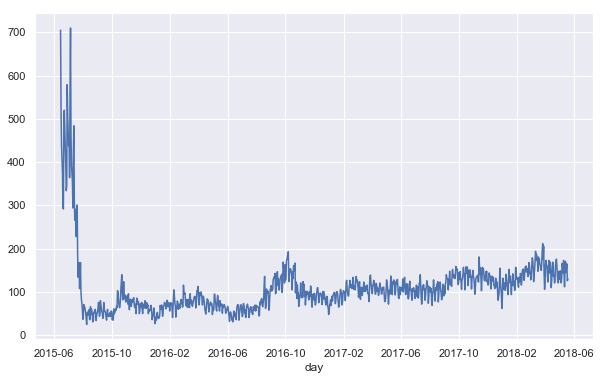

In [13]:
events_data.groupby('day').user_id.nunique().plot()
plt.show()

In [14]:
users_events_data = events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                       fill_value=0).reset_index()

In [15]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


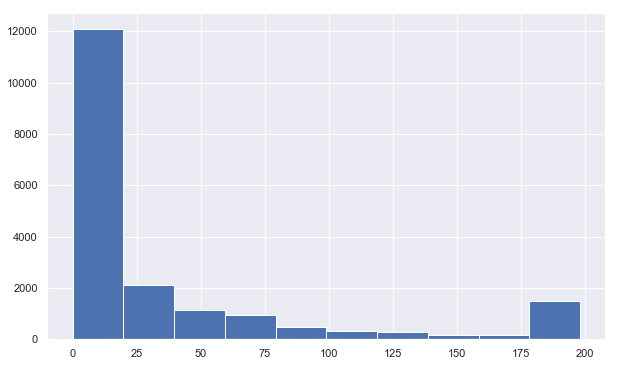

In [16]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                       fill_value=0).reset_index().discovered.hist()
plt.show()

## Данные о посылках

In [17]:
submissions_data = pd.read_csv("../data/submissions_data_train.zip")

In [18]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [19]:
submissions_data.shape

(509104, 4)

In [20]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [21]:
submissions_data['day'] = submissions_data.date.dt.date

In [22]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [23]:
users_scores = submissions_data.pivot_table(index='user_id', 
                             columns='submission_status', 
                             values='step_id', aggfunc='count',
                             fill_value=0).reset_index().head()

In [24]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [25]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

In [26]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [27]:
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [28]:
gap_data.shape

(19234,)

In [29]:
np.concatenate(gap_data, axis=0).shape

(97872,)

In [30]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).shape

(19234,)

In [31]:
events_data.user_id.nunique()

19234

In [32]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [33]:
gap_data = gap_data / (24 * 60 * 60)

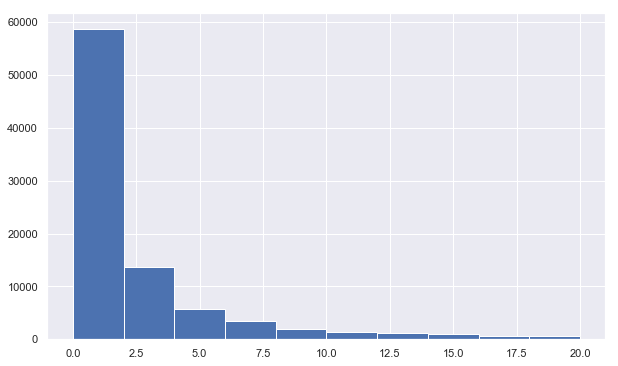

In [34]:
gap_data[gap_data < 20].hist()
plt.show()

In [35]:
gap_data.quantile(0.9)

18.325995370370403

In [36]:
gap_data.quantile(0.95)

59.760440972222156

### Поиск user_id

Анатолий Карпов - пользователь, который заходил на курс максимальное количество дней.

In [37]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(len).idxmax()

1046

### Подготовка данных

In [38]:
now = 1526772811
drop_out_threshold = 2592000

In [39]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [40]:
users_data = events_data.groupby('user_id', as_index=False). \
            agg({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [41]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [42]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [43]:
users_data.groupby('is_gone_user').agg({'user_id' : 'count'}).rename(columns={'user_id' : 'total_count'})

,total_count
is_gone_user,
False,1390
True,17844


In [44]:
users_data.user_id.nunique()

19234

In [45]:
users_data.shape

(19234, 3)

In [46]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [47]:
users_data = users_data.fillna(0)

In [48]:
users_data = users_data.merge(users_events_data, how='outer')

In [49]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [50]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [51]:
users_data = users_data.merge(users_days, how='outer')

In [52]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [53]:
users_data.user_id.nunique()

19234

In [54]:
users_data['passed_course'] = users_data.passed > 170

In [55]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [58]:
user_min_time = events_data.groupby('user_id', as_index=False) \
                .agg({'timestamp' : 'min'}) \
                .rename({'timestamp' : 'min_timestamp'}, axis=1)

In [59]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [92]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [93]:
events_data.shape

(3480703, 6)

In [61]:
events_data.merge(user_min_time, on='user_id', how='outer').head()

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [115]:
events_data_merged = events_data.merge(user_min_time, on='user_id', how='outer')

In [116]:
events_data_merged.shape

(3480703, 7)

In [117]:
events_data_merged.tail()

,step_id,timestamp,action,user_id,date,day,min_timestamp
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750
3480702,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,1526772750


In [118]:
(events_data_merged.timestamp - events_data_merged.min_timestamp).min()

0

In [119]:
((events_data_merged.timestamp - events_data_merged.min_timestamp) < 3 * 24 * 60 * 60).shape

(3480703,)

In [120]:
((events_data_merged.timestamp - events_data_merged.min_timestamp) < 3 * 24 * 60 * 60).value_counts()

False    2465723
True     1014980
dtype: int64

In [133]:
events_data_filtered = events_data_mergered[(events_data_mergered.timestamp - events_data_mergered.min_timestamp) < (3 * 24 * 60 * 60)]

In [135]:
events_data_filtered.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [136]:
events_data_filtered.tail()

,step_id,timestamp,action,user_id,date,day,min_timestamp
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750
3480702,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,1526772750


In [137]:
events_data_filtered.shape

(1014980, 7)

In [138]:
events_data.shape

(3480703, 6)

### Поиск шага

In [69]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [75]:
last_submissions = submissions_data.groupby('user_id', as_index=False).agg({'timestamp' : 'max'}) \
                    .rename({'timestamp' : 'last_timestamp'}, axis=1)

In [76]:
last_submissions.head()

,user_id,last_timestamp
0,2,1514383485
1,3,1444573728
2,5,1499859730
3,8,1480604143
4,14,1436368601


In [78]:
temp_merged = submissions_data.merge(last_submissions, on='user_id', how='outer')

last_steps = submissions_data[ temp_merged.timestamp == temp_merged.last_timestamp]

In [79]:
last_steps.head()

,step_id,timestamp,submission_status,user_id,date,day
46,33025,1479734163,correct,15853,2016-11-21 13:16:03,2016-11-21
133,31991,1436207389,correct,6640,2015-07-06 18:29:49,2015-07-06
262,33669,1436338096,correct,8624,2015-07-08 06:48:16,2015-07-08
629,33685,1435854481,correct,24821,2015-07-02 16:28:01,2015-07-02
783,33669,1436806235,correct,16503,2015-07-13 16:50:35,2015-07-13


In [83]:
last_steps.step_id.value_counts().head()

32812    2242
31978     978
33669     866
31991     400
32929     336
Name: step_id, dtype: int64

In [87]:
submissions_data[(submissions_data.user_id == 21158) & (submissions_data.timestamp == 1491590313)]

,step_id,timestamp,submission_status,user_id,date,day
300552,31972,1491590313,wrong,21158,2017-04-07 18:38:33,2017-04-07
300553,31972,1491590313,wrong,21158,2017-04-07 18:38:33,2017-04-07
300554,31972,1491590313,wrong,21158,2017-04-07 18:38:33,2017-04-07
300555,31972,1491590313,wrong,21158,2017-04-07 18:38:33,2017-04-07
300556,31972,1491590313,wrong,21158,2017-04-07 18:38:33,2017-04-07
300557,31972,1491590313,wrong,21158,2017-04-07 18:38:33,2017-04-07


### Events data продолжение

In [139]:
events_data_train = events_data_filtered

In [141]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [142]:
events_data_filtered.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


## Подготовка данных для обучения

In [143]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [144]:
submission_data_merged = submissions_data.merge(user_min_time, on='user_id', how='outer')

In [145]:
submission_data_merged.head()

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,1434345977
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,1434345977
2,31972.0,1.478852e+09,wrong,15853,2016-11-11 08:15:49,2016-11-11,1434345977
3,31972.0,1.478852e+09,correct,15853,2016-11-11 08:16:04,2016-11-11,1434345977
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434345977


In [150]:
submission_data_train = submission_data_merged[submission_data_merged.timestamp \
                                               - submission_data_merged.min_timestamp < 3*24*60*60]

In [151]:
submission_data_train.head()

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,1434345977
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,1434345977
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434345977
5,31976.0,1.434348e+09,correct,15853,2015-06-15 06:03:08,2015-06-15,1434345977
7,31977.0,1.434347e+09,correct,15853,2015-06-15 05:49:31,2015-06-15,1434345977


In [183]:
submission_data_train.groupby('user_id').day.nunique().max()

4

In [184]:
X = submission_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
            .rename(columns={'day' : 'days'})

In [185]:
X.head()

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [186]:
steps_tried = submission_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
            .rename(columns={'step_id' : 'steps_tried'})

In [187]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [188]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [189]:
X = X.merge(submission_data_train.pivot_table(index='user_id', 
                             columns='submission_status', 
                             values='step_id', aggfunc='count',
                             fill_value=0).reset_index())

In [190]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


In [191]:
X.shape

(8913, 5)

In [192]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [193]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [194]:
X = X.merge(events_data_train.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).reset_index()[['user_id','viewed']], how='outer')

In [195]:
X.shape

(19234, 7)

In [196]:
X = X.fillna(0)

In [197]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [198]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [199]:
X = X[X.is_gone_user | X.passed_course]

In [200]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [201]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [202]:
y = X.passed_course

In [203]:
X = X.drop(['passed_course', 'is_gone_user'],axis=1)

In [204]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [205]:
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132
